# Bob Bell IPND Data Analysis Project: No-Show Appointments

## Importing Dataset

In [208]:
import pandas as pd

noshow_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

## Investigating and Pre-Processing Dataset

Let's view the first few elements of the dataframe.

In [209]:
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's get a description of the values of each column in the dataframe

In [210]:
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Count for all variables is 110527. Note that the minimum age is -1; this seems like an error so we should remove this row. The maximum age is 115, which seems a bit much, but let's assume for our analysis that there are centenarians in Brazil (https://www.demographic-research.org/Volumes/Vol20/20/20-20.pdf) who also go to their doctor's visits.

Let's also check if the dataframe has any na values. If so, we will drop corresponding rows.

In [211]:
# Drop all rows with na values
noshow_nona_df = noshow_df.dropna()

In [212]:
# Check that the length of the dataframe is the same as noshow_df
print(len(noshow_nona_df))

110527


Since both dataframes have the same length, let's stick with noshow_df for the rest of the analysis.

Now, let's find the row where age=-1 and remove it. Here is how to find row where column equals some value: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas#17071908

In [213]:
noshow_df.loc[noshow_df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Here is how to remove the row of a dataframe based on a column value: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value 

In [214]:
noshow_df = noshow_df[noshow_df.Age != -1]

In [215]:
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now we see that the minimum age is 0 (newborn baby) instead of -1. Note that we now have 110526 entries in our dataframe instead of 110527.

Let's also make sure that the ScheduledDay is not after the AppointmentDay.

In [216]:
noshow_df[noshow_df.ScheduledDay <= noshow_df.AppointmentDay]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No
14,9.988472e+13,5633951,F,2016-04-28T10:06:24Z,2016-04-29T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,0,No
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No


In [217]:
print(len(noshow_df[noshow_df.ScheduledDay <= noshow_df.AppointmentDay]))

71959


Only 71959 rows have the date/time of scheduling before or at the same time as the appointment. I will drop rows that do not fit this criteria.

In [218]:
noshow_df = noshow_df[noshow_df.ScheduledDay <= noshow_df.AppointmentDay]

In [219]:
print(len(noshow_df))

71959


This resulting dataframe - noshow_df - only has 71959 rows. Now we are ready to do some data analysis.

## Question 1: Which neighborhoods have the greatest percentage of no-shows?

First, let's find out how many appointments happened in each neighborhood. Source: https://stackoverflow.com/questions/12207326/frequency-table-for-a-single-variable. We will create a new Pandas Series num_appt_per_nbd.

In [220]:
num_appts_per_nbd = noshow_df['Neighbourhood'].value_counts()

In [221]:
num_appts_per_nbd.sort_values()

ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         5
ILHA DO FRADE                     8
ILHA DO BOI                      23
PONTAL DE CAMBURI                41
MORADA DE CAMBURI                78
SEGURANÇA DO LAR                103
NAZARETH                        108
UNIVERSITÁRIO                   112
HORTO                           114
SANTA HELENA                    126
ENSEADA DO SUÁ                  163
MÁRIO CYPRESTE                  173
ARIOVALDO FAVALESSA             175
ANTÔNIO HONÓRIO                 180
FRADINHOS                       193
BOA VISTA                       221
DE LOURDES                      222
COMDUSA                         237
PIEDADE                         274
SANTA LUÍZA                     284
BARRO VERMELHO                  285
SANTA LÚCIA                     298
DO MOSCOSO                      306
SOLON BORGES                    337
ESTRELINHA                      344
SANTA CECÍLIA                   349
SANTOS REIS                 

Let's do a vectorized operation where if no-show == 'Yes', we set no_show_val = 1, else no_show_val = 0.

Use vectorized operation to create new column (noshow_val) with same initial value (noshow_val=0).

Using apply and lambda functions, we do the following: If No-show == Yes, then set noshow_val to 1, else keep it 0.

In [222]:
noshow_df['noshow_val'] = noshow_df['No-show'].apply(lambda x: int(x == 'Yes'))

In [223]:
noshow_df.iloc[0:100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,noshow_val
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,0
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No,0
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,1
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No,0
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No,0
14,9.988472e+13,5633951,F,2016-04-28T10:06:24Z,2016-04-29T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,0,No,0
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No,0


We can see that our dataframe does what we wanted.

Now let's add up the number of no-shows per neighborhood.

In [224]:
noshow_per_neighborhood = noshow_df.groupby("Neighbourhood").sum()['noshow_val']

In [225]:
noshow_per_neighborhood.sort_values()

Neighbourhood
AEROPORTO                         1
ILHA DO FRADE                     2
ILHA DO BOI                       2
ILHAS OCEÂNICAS DE TRINDADE       2
PONTAL DE CAMBURI                12
MORADA DE CAMBURI                16
SEGURANÇA DO LAR                 26
NAZARETH                         29
UNIVERSITÁRIO                    31
SANTA HELENA                     35
HORTO                            41
ANTÔNIO HONÓRIO                  43
DE LOURDES                       45
FRADINHOS                        47
MÁRIO CYPRESTE                   47
ENSEADA DO SUÁ                   48
COMDUSA                          55
BOA VISTA                        55
ARIOVALDO FAVALESSA              57
SOLON BORGES                     65
SANTA LUÍZA                      66
SANTA LÚCIA                      77
BARRO VERMELHO                   79
DO CABRAL                        80
PIEDADE                          83
DO MOSCOSO                       87
ESTRELINHA                       91
SANTOS REIS   

In [226]:
type(noshow_per_neighborhood)

pandas.core.series.Series

Now, let's join the two Pandas Series into a dataframe neighborhood_df.

In [227]:
neighborhood_df = noshow_per_neighborhood.to_frame().join(num_appts_per_nbd)

In [228]:
neighborhood_df.head()

,noshow_val,Neighbourhood
Neighbourhood,,
AEROPORTO,1,5
ANDORINHAS,491,1524
ANTÔNIO HONÓRIO,43,180
ARIOVALDO FAVALESSA,57,175
BARRO VERMELHO,79,285


Now let's create a new column where we get no_show percentage

In [229]:
neighborhood_df['noshow_rate'] = neighborhood_df['noshow_val']/neighborhood_df['Neighbourhood'] 

In [230]:
neighborhood_df.sort_values(by='noshow_rate', ascending = False)

,noshow_val,Neighbourhood,noshow_rate
Neighbourhood,,,
ILHAS OCEÂNICAS DE TRINDADE,2,2,1.000000
GURIGICA,424,1105,0.383710
JESUS DE NAZARETH,658,1755,0.374929
ITARARÉ,869,2381,0.364973
HORTO,41,114,0.359649
SANTOS DUMONT,306,877,0.348917
SANTA CLARA,129,381,0.338583
SANTA CECÍLIA,117,349,0.335244
ARIOVALDO FAVALESSA,57,175,0.325714


Top 5 neighborhoods with no-shows are: 
* ILHAS OCEÂNICAS DE TRINDADE	
* GURIGICA	
* JESUS DE NAZARETH	
* ITARARÉ	
* HORTO	

## Question 2: What percentage of people who have some condition (i.e., hypertension, alcoholism, handicap, or diabetes) show vs. no-show?

Let's create new column for people with any condition, similar to what we did above.

Using vectorized operation, we will create a column where if anyone has a condition, they have boolean value of True or False.

In [231]:
noshow_df['condition'] = ((noshow_df['Hipertension'] + noshow_df['Diabetes'] + noshow_df['Alcoholism'] + noshow_df['Handcap']) != 0)

In [232]:
noshow_df.iloc[0:100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,noshow_val,condition
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,0,True
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,False
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,False
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0,False
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No,0,False
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,1,False
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No,0,False
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No,0,False
14,9.988472e+13,5633951,F,2016-04-28T10:06:24Z,2016-04-29T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,0,No,0,False
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No,0,False


And here is a plot of people with and without a condition who show up to their appointments.

In [233]:
num_appts_per_condition = noshow_df['condition'].value_counts()

Now we have list of the appointments per condition type.

In [234]:
num_appts_per_condition

False    54299
True     17660
Name: condition, dtype: int64

Similar to above, we will count the number of noshow's per condition type. Since this fits into one line, it is not useful to create a function for this.

In [235]:
noshow_per_condition = noshow_df.groupby("condition").sum()['noshow_val']

Now let's see our results.

In [236]:
noshow_per_condition

condition
False    16146
True      4376
Name: noshow_val, dtype: int64

Now, let's join both Pandas Series into a dataframe condition_df

In [237]:
condition_df = noshow_per_condition.to_frame().join(num_appts_per_condition)

And let's view the dataframe

In [238]:
condition_df

,noshow_val,condition
condition,,
False,16146,54299
True,4376,17660


As above, we will create new column for noshow rate and sort in descending order. Since these lines are short, it doesn't make sense to write a function.

In [239]:
condition_df['noshow_rate'] = condition_df['noshow_val']/condition_df['condition'] 
condition_df.sort_values(by='noshow_rate', ascending = False)

,noshow_val,condition,noshow_rate
condition,,,
False,16146,54299,0.297354
True,4376,17660,0.247792


Finally, let's plot the results as a bar graph. 

In [240]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


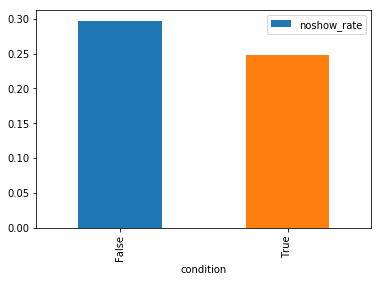

In [241]:
condition_df.plot(y='noshow_rate', kind='bar')

Interestingly, the people with a condition actually show up at a higher rate than those without a condition. This might mean that people with some condition are less likely to miss their visits. However, this would require more investigation beyond the scope of this course.